# BigMart Sales Prediction

![](https://www.analyticsvidhya.com/wp-content/uploads/2016/02/Comp-4.jpg)

## Objective

The data scientists at BigMart have collected sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store (each row of data).

__So the idea is to find out the features (properties) of a product, and store which impacts the sales of a product.__






<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Prepare Training and Test Datasets</a>

<a href=#four>4. Exploratory Data Analysis (EDA)</a>

<a href=#five>5. Data Engineering</a>

<a href=#six>6. Modeling and Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section we will import the required libraries that will be used throughout our analysis and modelling. |

---

In [114]:
# Importing Packages
import pandas as pd
import numpy as np
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Packages to split the data for testing and training
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import cross_validate
from sklearn.feature_extraction import FeatureHasher


from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor
import xgboost as xgb
from lightgbm import LGBMRegressor
from xgboost import plot_importance

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section we will load the data from the `train` file into a DataFrame. |

---

In [5]:
# Loading the Data
df = pd.read_csv('sales_prediction.csv')

In [6]:
df.head() #The first 5 rows of the traing dataset

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


After taking a look at the frist five rows of the dataframe we can see that we have Twelve (12) columns in the dataFrame. This means that we have eleven features and a target called 'Item_Outlet_Sales'.

Item_Identifier = Unique product ID

Item_Weight = Weight of Product

Item_Fat_Content = Whether product is low fat or not

Item_Visibility = The % of total display area of all products in a store allocated to a particular product

Item_Type = The category to which product belongs

Item_MRP = Maximum retail Price(list price) of the product

Outlet_Identifier = Unique Store ID

Outlet_Establishment_Year = The year in which store was established

Outlet_Size = The size of the store in terms of ground are covered
Outlet_Location_Type = Type of city in which the store is located

Outlet_Type = Whether the outlet is just a grocery store or some sort of supermarket

Item_Outlet_Sales = Sales of the product in a particular store. This is the target variable to be predicted.

<a id="three"></a>
## 3. Preparing Training and Test Datasets
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


 we need data to train model and we also need unseen data to test model performance

In [7]:
# Split the dataset into train (70%) & validation (30%) for model training
X = df.drop(['Item_Outlet_Sales'], axis=1) #Independent Variables also known as Features
y = df['Item_Outlet_Sales'] #Dependent Variable also known as Target

# Split the train data to create validation dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
print('Dimension of train is: ', X_train.shape)
print('Dimension of test is  :', X_test.shape)

Dimension of train is:  (5966, 11)
Dimension of test is  : (2557, 11)


In [9]:
X_train.head() # The first 5 rows of the X_train dataset

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,7.72,Regular,0.147904,Fruits and Vegetables,116.6466,OUT010,1998,NaN,Tier 3,Grocery Store
655,NCJ42,19.75,Low Fat,0.014301,Household,103.0332,OUT046,1997,Small,Tier 1,Supermarket Type1
2229,FDY47,NaN,Regular,0.054221,Breads,129.1310,OUT027,1985,Medium,Tier 3,Supermarket Type3
2537,FDN45,19.35,Low Fat,0.118342,Snack Foods,222.6088,OUT045,2002,NaN,Tier 2,Supermarket Type1
3528,FDY16,18.35,Regular,0.092150,Frozen Foods,184.8266,OUT013,1987,High,Tier 3,Supermarket Type1


In [10]:
y_train.head() # The first 5 rows of the X_train dataset

1921     117.8466
655     1230.3984
2229    4933.5780
2537    1789.6704
3528    3872.9586
Name: Item_Outlet_Sales, dtype: float64

We split the data right at the start, so that we don't end up getting information from the test data (or X_test) indirectly when we are training our model.

<a id="four"></a>
## 4. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, we will perform an in-depth analysis of the variables in the DataFrame. |

---

In [11]:
# Make a copy to do explorations/modifications
X_train_c = X_train.copy()

Now let's take a look at the data types in the dataframe using X_train_c.info() to get more information about the dataframe

In [12]:
X_train_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5966 entries, 1921 to 7270
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5966 non-null   object 
 1   Item_Weight                4943 non-null   float64
 2   Item_Fat_Content           5966 non-null   object 
 3   Item_Visibility            5966 non-null   float64
 4   Item_Type                  5966 non-null   object 
 5   Item_MRP                   5966 non-null   float64
 6   Outlet_Identifier          5966 non-null   object 
 7   Outlet_Establishment_Year  5966 non-null   int64  
 8   Outlet_Size                4276 non-null   object 
 9   Outlet_Location_Type       5966 non-null   object 
 10  Outlet_Type                5966 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 559.3+ KB


Looking at the above output we can see that we have a total of 5966 rows and we can also see that some are of type object, some of type float and one is of type int. We can also see that the Item_Weight and Outlet_Size columns have some null values. But we can double check this using isnull,

In [13]:
X_train_c.isnull().sum()

Item_Identifier                 0
Item_Weight                  1023
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1690
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

We can therefore see that, Item_Weight has 1023 rows missing and Outlet_Size has 1690 rows missing.

Now let's do some EDA on the numeric features, i.e. columns with Dtype float and int.

In [14]:
num_data = X_train_c.select_dtypes(exclude=['object'])
num_data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
1921,7.72,0.147904,116.6466,1998
655,19.75,0.014301,103.0332,1997
2229,NaN,0.054221,129.1310,1985
2537,19.35,0.118342,222.6088,2002
3528,18.35,0.092150,184.8266,1987


In [15]:
num_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4943.000000,5966.000000,5966.000000,5966.000000
mean,12.937193,0.065821,141.814242,1997.867248
std,4.630433,0.051093,62.627609,8.385023
min,4.555000,0.000000,31.290000,1985.000000
25%,8.895000,0.026982,94.144250,1987.000000
50%,12.650000,0.053923,143.879900,1999.000000
75%,17.000000,0.094350,186.621400,2004.000000
max,21.350000,0.328391,266.888400,2009.000000


Again looking for null values for the numeric columns and we see Item_Weight has null values as confirmed before.

In [16]:
num_data.isnull().sum()

Item_Weight                  1023
Item_Visibility                 0
Item_MRP                        0
Outlet_Establishment_Year       0
dtype: int64

In [17]:
num_data.skew()

Item_Weight                  0.072269
Item_Visibility              1.165437
Item_MRP                     0.117399
Outlet_Establishment_Year   -0.399953
dtype: float64

The features Item_Weight, Item_MRP and Outlet_Establishment_Year are said to be fairly symmetrical and Item_Visibility is the only feature that is highly skewed.

In [18]:
num_data.kurtosis()

Item_Weight                 -1.225795
Item_Visibility              1.735548
Item_MRP                    -0.899213
Outlet_Establishment_Year   -1.205611
dtype: float64

Indicates a lack of outliers for all features.

In [19]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


The correlation table shows that Item_MRP and Item_outlet_Sales have a moderate positive correlation.

Now we will visualize our numeric features

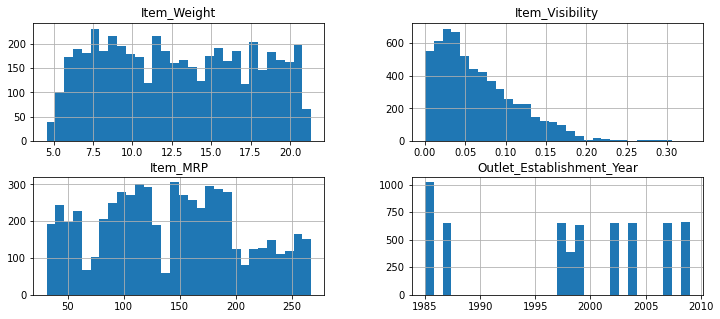

In [20]:
X_train_c.hist(bins=30, figsize=(12,5))
plt.show()

<AxesSubplot:ylabel='Item_Weight'>

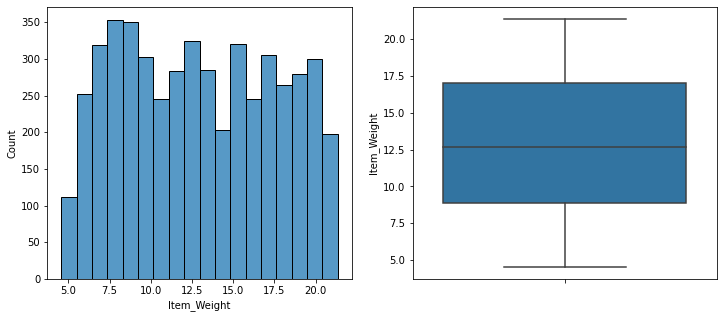

In [21]:
# Looking at the Item_Weight feature
fig, ax = plt.subplots(1,2, figsize=(12,5))

sns.histplot(data=X_train_c, x='Item_Weight', ax=ax[0])
sns.boxplot(data=X_train_c, y='Item_Weight', ax=ax[1])

Looking at the boxplot, we can see that the Item_Weight column has no outliers as confirmed by using kurtosis earlier.

In [22]:
def visualize_numeric_feature(df, col_name):
  fig, ax = plt.subplots(1,2, figsize=(12,5))

  sns.histplot(data=df, x=col_name, ax=ax[0])
  sns.boxplot(data=df, y=col_name, ax=ax[1])

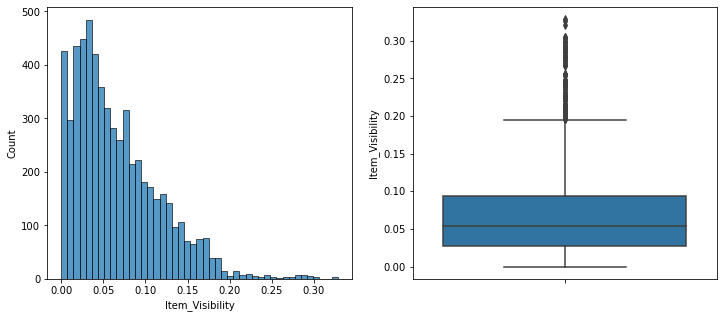

In [23]:
# Looking at Item_Visibility feature
visualize_numeric_feature(X_train_c,"Item_Visibility")

The boxplot shows that there exist outliers, i.e. items with high visibilty. We will not be removing these outliers because they could be useful for us because high visibility items could indicate they may sell more.

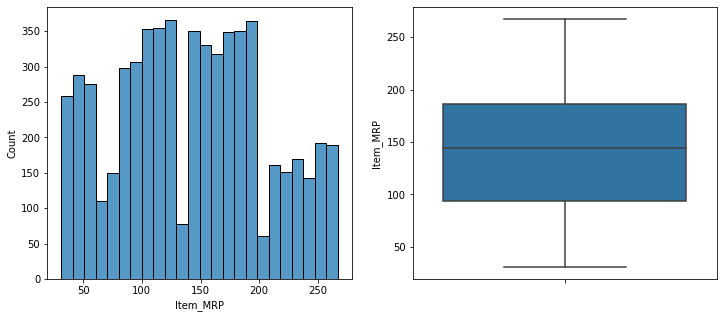

In [24]:
# Looking at Item_MRP feature
visualize_numeric_feature(X_train_c,"Item_MRP")

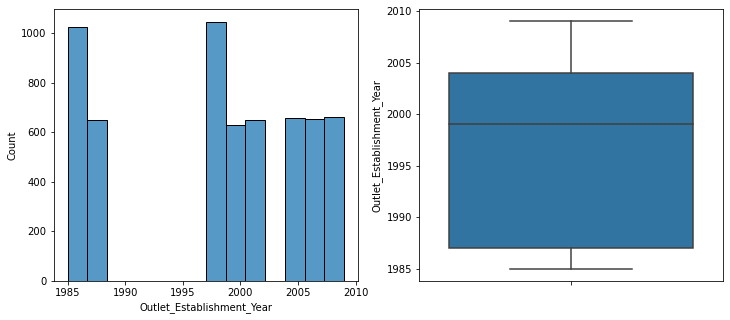

In [25]:
# Looking at Outlet_Establishment_Year feature
visualize_numeric_feature(X_train_c,"Outlet_Establishment_Year")

It's better to use countplot since Outlet_Establishment_Year is not a continuous variable.

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

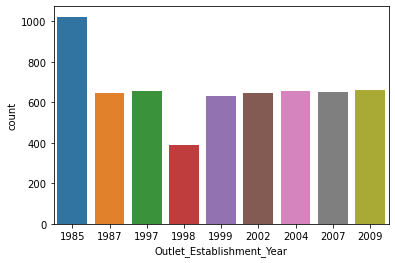

In [26]:
sns.countplot(data=X_train_c, x='Outlet_Establishment_Year')

We can see that Big Mart established a lot of stores in the year 1995.

In [27]:
# Now moving on to categorical features
cat_data = X_train_c.select_dtypes(include=['object'])
cat_data.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
655,NCJ42,Low Fat,Household,OUT046,Small,Tier 1,Supermarket Type1
2229,FDY47,Regular,Breads,OUT027,Medium,Tier 3,Supermarket Type3
2537,FDN45,Low Fat,Snack Foods,OUT045,NaN,Tier 2,Supermarket Type1
3528,FDY16,Regular,Frozen Foods,OUT013,High,Tier 3,Supermarket Type1


In [28]:
cat_data.describe()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,5966,5966,5966,5966,4276,5966,5966
unique,1543,5,16,10,3,3,4
top,NCI54,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,9,3535,905,668,1960,2367,3893


We can see that Outlet_Size has null values that we will have to deal with. Top basically means the frequently occuring values or the mode value.

In [29]:
cat_data.isnull().sum()

Item_Identifier            0
Item_Fat_Content           0
Item_Type                  0
Outlet_Identifier          0
Outlet_Size             1690
Outlet_Location_Type       0
Outlet_Type                0
dtype: int64

In [30]:
cat_data['Item_Identifier'].value_counts()

NCI54    9
FDF52    9
FDV60    8
FDT07    8
NCB18    8
        ..
FDT47    1
NCW42    1
DRH59    1
FDV14    1
FDG28    1
Name: Item_Identifier, Length: 1543, dtype: int64

This basically shows that there are many items which are sold at only one store.

In [31]:
cat_data['Item_Fat_Content'].value_counts()

Low Fat    3535
Regular    2027
LF          243
low fat      82
reg          79
Name: Item_Fat_Content, dtype: int64

We can see that there are inconsistency in our dataset where Low Fat and regular have been mentioned in more than one way. We have to merge Low Fat, LF and low fat in a same categorical string. The same applies to Regular and reg.

In [32]:
cat_data['Item_Type'].value_counts()

Fruits and Vegetables    905
Snack Foods              835
Household                648
Frozen Foods             591
Dairy                    474
Canned                   450
Baking Goods             438
Health and Hygiene       365
Soft Drinks              305
Meat                     275
Hard Drinks              162
Breads                   159
Others                   124
Starchy Foods            116
Breakfast                 80
Seafood                   39
Name: Item_Type, dtype: int64

In [33]:
cat_data['Outlet_Identifier'].value_counts()

OUT027    668
OUT018    661
OUT046    656
OUT035    656
OUT017    652
OUT045    649
OUT013    649
OUT049    631
OUT010    389
OUT019    355
Name: Outlet_Identifier, dtype: int64

This tells us there are a total of 10 stores which are selling products.

In [34]:
cat_data['Outlet_Size'].value_counts()

Medium    1960
Small     1667
High       649
Name: Outlet_Size, dtype: int64

In [35]:
cat_data['Outlet_Location_Type'].value_counts()

Tier 3    2367
Tier 2    1957
Tier 1    1642
Name: Outlet_Location_Type, dtype: int64

In [36]:
cat_data['Outlet_Type'].value_counts()

Supermarket Type1    3893
Grocery Store         744
Supermarket Type3     668
Supermarket Type2     661
Name: Outlet_Type, dtype: int64

<a id="five"></a>
## 5. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
|⚡ Description: Data engineering ⚡ |
|:--------------------------- |
| In this section we will: clean the dataset, and possibly create new features - as identified in the EDA phase.



Step 1 : Create High Level Item Types

In [37]:
X_train_c['Item_Identifier'].apply(lambda x: x[:2])

1921    FD
655     NC
2229    FD
2537    FD
3528    FD
        ..
5734    FD
5191    FD
5390    NC
860     FD
7270    NC
Name: Item_Identifier, Length: 5966, dtype: object

In [38]:
X_train_c['Item_Identifier'].apply(lambda x: x[:2]).value_counts()

FD    4269
NC    1137
DR     560
Name: Item_Identifier, dtype: int64

In [39]:
# Step 1: Map Item IDs to Item Types
def create_item_type(df):
  df['Item_Type'] = df['Item_Identifier'].str[:2]
  df['Item_Type'] = df['Item_Type'].map({
                              'FD' : 'Food',
                              'NC' : 'Non_consumables',
                              'DR' : 'Drink'
  })
  return df

In [40]:
X_train_c = create_item_type(X_train_c)
X_train_c.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,7.72,Regular,0.147904,Food,116.6466,OUT010,1998,NaN,Tier 3,Grocery Store
655,NCJ42,19.75,Low Fat,0.014301,Non_consumables,103.0332,OUT046,1997,Small,Tier 1,Supermarket Type1
2229,FDY47,NaN,Regular,0.054221,Food,129.1310,OUT027,1985,Medium,Tier 3,Supermarket Type3
2537,FDN45,19.35,Low Fat,0.118342,Food,222.6088,OUT045,2002,NaN,Tier 2,Supermarket Type1
3528,FDY16,18.35,Regular,0.092150,Food,184.8266,OUT013,1987,High,Tier 3,Supermarket Type1


Step 2: Fill in missing values for Item_Weight

In [41]:
X_train_c.isnull().sum()

Item_Identifier                 0
Item_Weight                  1023
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1690
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [42]:
X_train_c[['Item_Identifier', 'Item_Weight']].drop_duplicates().sort_values(by=['Item_Identifier'])

,Item_Identifier,Item_Weight
1245,DRA12,11.60
4900,DRA24,19.35
6057,DRA59,NaN
1876,DRA59,8.27
3733,DRB01,NaN
...,...,...
411,NCZ42,10.50
2084,NCZ53,NaN
6879,NCZ53,9.60
7926,NCZ54,14.65


In some cases we have the same Item Identifier but the drop_duplicate function doesn't remove them because we have different values in the second column, i.e. the Item_Weght column.

In [43]:
X_train_c[['Item_Type', 'Item_Weight']].drop_duplicates().sort_values(by=['Item_Type'])

,Item_Type,Item_Weight
2796,Drink,5.730
998,Drink,20.250
670,Drink,8.395
6091,Drink,13.500
3438,Drink,13.850
...,...,...
6624,Non_consumables,12.600
6191,Non_consumables,8.880
1911,Non_consumables,19.850
135,Non_consumables,7.235


In [44]:
# Step 2: fill in missing values for Item_Weight
# Logic
# 1st step: Use mapping of Item ID - weight and fill in missing values
# 2nd step: If completely new item
# i.e Item ID not in test, than use item type - median(weight) and fill in missing values

ITEM_ID_WEIGHT_PIVOT = X_train_c.pivot_table(values='Item_Weight', index='Item_Identifier').reset_index()
ITEM_ID_WEIGHT_MAPPING = dict(zip(ITEM_ID_WEIGHT_PIVOT['Item_Identifier'], ITEM_ID_WEIGHT_PIVOT['Item_Weight']))
list(ITEM_ID_WEIGHT_MAPPING.items())[:10]

[('DRA12', 11.6),
 ('DRA24', 19.35),
 ('DRA59', 8.27),
 ('DRB01', 7.39),
 ('DRB13', 6.115),
 ('DRB24', 8.785),
 ('DRB25', 12.300000000000002),
 ('DRB48', 16.75),
 ('DRC01', 5.92),
 ('DRC12', 17.85)]

In [45]:
ITEM_TYPE_WEIGHT_PIVOT = X_train_c.pivot_table(values='Item_Weight', index='Item_Type', aggfunc='median').reset_index()
ITEM_TYPE_WEIGHT_MAPPING = dict(zip(ITEM_TYPE_WEIGHT_PIVOT['Item_Type'], ITEM_TYPE_WEIGHT_PIVOT['Item_Weight']))
list(ITEM_TYPE_WEIGHT_MAPPING.items())

[('Drink', 11.8), ('Food', 12.8), ('Non_consumables', 13.05)]

In [46]:
def impute_item_weight(df):
  # 1st logic item id - weght
  df.loc[:,'Item_Weight'] = df.loc[:, 'Item_Weight'].fillna(df.loc[:, 'Item_Identifier'].map(ITEM_ID_WEIGHT_MAPPING))
  # 2nd logic item type - weight if any still missing
  df.loc[:,'Item_Weight'] = df.loc[:, 'Item_Weight'].fillna(df.loc[:, 'Item_Type'].map(ITEM_TYPE_WEIGHT_MAPPING))

  return df

In [47]:
X_train_c = impute_item_weight(X_train_c)

In [48]:
X_train_c.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1690
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

STEP 3: FILL IN MISSING VALUES FOR OUTLET_SIZE

In [49]:
X_train_c.groupby(by=['Outlet_Type', 'Outlet_Size']).size()

Outlet_Type        Outlet_Size
Grocery Store      Small           355
Supermarket Type1  High            649
                   Medium          631
                   Small          1312
Supermarket Type2  Medium          661
Supermarket Type3  Medium          668
dtype: int64

So if the Outlet_Type is Supermarket Type1, we will use the frequently occuring Outlet_Size to fill in the missing value. Therefore, we will use the Outlet_Size category called Small.

In [50]:
# Step 3 : Impute the missing values for Outlet_Size
# Logic:
# 1st step: Use mapping of Outlet_Type - mode(Outlet_Size) and fill in missing values
OUTLET_TYPE_SIZE_PIVOT = X_train_c.pivot_table(values='Outlet_Size', index='Outlet_Type', aggfunc=(lambda x: mode(x).mode[0] )).reset_index()
OUTLET_TYPE_SIZE_MAPPING = dict(zip(OUTLET_TYPE_SIZE_PIVOT['Outlet_Type'], OUTLET_TYPE_SIZE_PIVOT['Outlet_Size']))
list(OUTLET_TYPE_SIZE_MAPPING.items())

[('Grocery Store', 'Small'),
 ('Supermarket Type1', 'Small'),
 ('Supermarket Type2', 'Medium'),
 ('Supermarket Type3', 'Medium')]

In [51]:
def impute_outlet_size(df):
  # 1st logic Outlet_Type - mode(Outlet_Size)
  df.loc[:, 'Outlet_Size'] = df.loc[:, 'Outlet_Size'].fillna(df.loc[:, 'Outlet_Type'].map(OUTLET_TYPE_SIZE_MAPPING))

  return df

In [52]:
X_train_c = impute_outlet_size(X_train_c)

In [53]:
X_train_c.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

## Step 4: Standardize Item_Fat_Content Categories

In [54]:
X_train_c['Item_Fat_Content'].value_counts()

Low Fat    3535
Regular    2027
LF          243
low fat      82
reg          79
Name: Item_Fat_Content, dtype: int64

In [55]:
# Make Item_Fat_Content categories consistent
def consistent_item_fat_content(df):
  df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({
                                        'Low Fat' : 'Low_Fat',
                                        'LF' : 'Low_Fat',
                                        'low fat' : 'Low_Fat',
                                        'reg' : 'Regular'})
  return df

In [56]:
X_train_c = consistent_item_fat_content(X_train_c)

In [57]:
X_train_c['Item_Fat_Content'].value_counts()

Low_Fat    3860
Regular    2106
Name: Item_Fat_Content, dtype: int64

## Step 5: Correct item fat content for non-consumables

In [58]:
X_train_c.groupby(by=['Item_Type', 'Item_Fat_Content']).size()

Item_Type        Item_Fat_Content
Drink            Low_Fat              517
                 Regular               43
Food             Low_Fat             2206
                 Regular             2063
Non_consumables  Low_Fat             1137
dtype: int64

We can see that Non-consumbles also has low fat content which doesn't make any sense, so we have to fix this.

In [59]:
X_train_c.loc[X_train_c['Item_Type'] == 'Non_consumables', 'Item_Fat_Content']

655     Low_Fat
4423    Low_Fat
907     Low_Fat
7021    Low_Fat
6074    Low_Fat
         ...   
8322    Low_Fat
466     Low_Fat
6265    Low_Fat
5390    Low_Fat
7270    Low_Fat
Name: Item_Fat_Content, Length: 1137, dtype: object

In [60]:
# Correct Item_Fat_Content for Non_consumables
def correction(df):
  df.loc[df['Item_Type'] == 'Non_consumables', 'Item_Fat_Content'] = 'Non_Edible'

  return df

In [61]:
X_train_c = correction(X_train_c)
X_train_c.groupby(by=['Item_Type', 'Item_Fat_Content']).size()

Item_Type        Item_Fat_Content
Drink            Low_Fat              517
                 Regular               43
Food             Low_Fat             2206
                 Regular             2063
Non_consumables  Non_Edible          1137
dtype: int64

Now let's have a look at the cleaned dataset.

In [62]:
X_train_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5966 entries, 1921 to 7270
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5966 non-null   object 
 1   Item_Weight                5966 non-null   float64
 2   Item_Fat_Content           5966 non-null   object 
 3   Item_Visibility            5966 non-null   float64
 4   Item_Type                  5966 non-null   object 
 5   Item_MRP                   5966 non-null   float64
 6   Outlet_Identifier          5966 non-null   object 
 7   Outlet_Establishment_Year  5966 non-null   int64  
 8   Outlet_Size                5966 non-null   object 
 9   Outlet_Location_Type       5966 non-null   object 
 10  Outlet_Type                5966 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 688.4+ KB


## Prepare Dataset for Modelling

In [63]:
def prepare_dataset(df):
  # create Item_Type
  df = create_item_type(df)

  # fill in missing values for Item_Weight
  df = impute_item_weight(df)

  # Impute missing values for Outlet_Size
  df = impute_outlet_size(df)

  # Make Item_Fat_Content categories consistent
  df = consistent_item_fat_content(df)

  # Correct Item_Fat_Content for Non_consumables
  df = correction(df)

  return df

Now let's look at our actual training and testing datasets and we also have to clean the datasets,

In [64]:
X_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1023
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1690
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [65]:
X_train = prepare_dataset(X_train)
X_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [66]:
X_test.isnull().sum()

Item_Identifier                0
Item_Weight                  440
Item_Fat_Content               0
Item_Visibility                0
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                  720
Outlet_Location_Type           0
Outlet_Type                    0
dtype: int64

In [67]:
X_test = prepare_dataset(X_test)
X_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

## Handling Categorical Data

All categorical columns must be one-hot encoded because machine learning algorithms only understand numerical data.

In [68]:
cat_data = X_train_c.select_dtypes(include=['object'])
cat_data.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,Regular,Food,OUT010,Small,Tier 3,Grocery Store
655,NCJ42,Non_Edible,Non_consumables,OUT046,Small,Tier 1,Supermarket Type1
2229,FDY47,Regular,Food,OUT027,Medium,Tier 3,Supermarket Type3
2537,FDN45,Low_Fat,Food,OUT045,Small,Tier 2,Supermarket Type1
3528,FDY16,Regular,Food,OUT013,High,Tier 3,Supermarket Type1


In [69]:
hot = OneHotEncoder(handle_unknown='ignore')
hot.fit(cat_data)

OneHotEncoder(handle_unknown='ignore')

In [70]:
hot_feature_names = hot.get_feature_names_out(input_features=cat_data.columns)
hot_feature_names

array(['Item_Identifier_DRA12', 'Item_Identifier_DRA24',
       'Item_Identifier_DRA59', ..., 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3'],
      dtype=object)

In [71]:
# Our numeric data
num_data_train = X_train.select_dtypes(exclude=['object']).reset_index(drop=True)
num_data_train.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,7.72,0.147904,116.6466,1998
1,19.75,0.014301,103.0332,1997
2,8.60,0.054221,129.1310,1985
3,19.35,0.118342,222.6088,2002
4,18.35,0.092150,184.8266,1987


In [72]:
# Our encoded categorical data
cat_data_train = X_train.select_dtypes(include=['object'])
X_train_cat = pd.DataFrame(hot.transform(cat_data_train).toarray(), columns=hot_feature_names)
X_train_cat.head()

,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,Item_Identifier_DRB25,Item_Identifier_DRB48,Item_Identifier_DRC01,Item_Identifier_DRC12,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


So, now lets join the two datasets(i.e numeric and categorical data) into one training dataset

In [73]:
X_train_final = pd.concat([num_data_train, X_train_cat], axis=1)
X_train_final.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,7.72,0.147904,116.6466,1998,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,19.75,0.014301,103.0332,1997,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,8.60,0.054221,129.1310,1985,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,19.35,0.118342,222.6088,2002,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,18.35,0.092150,184.8266,1987,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


The same process will be carried out for test dataset

In [74]:
final_col = X_train_final.columns.values
final_col

array(['Item_Weight', 'Item_Visibility', 'Item_MRP', ...,
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3'], dtype=object)

In [75]:
num_data_test = X_test.select_dtypes(exclude=['object']).reset_index(drop=True)
cat_data_test = X_test.select_dtypes(include=['object'])
X_test_cat_hot = pd.DataFrame(hot.transform(cat_data_test).toarray(), columns=hot_feature_names)
X_test_final = pd.concat([num_data_test, X_test_cat_hot], axis=1)
X_test_final = X_test_final[final_col]

X_test_final.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,14.300,0.026300,79.4302,1987,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,7.930,0.071136,42.7086,1997,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,14.500,0.041313,42.0454,1999,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,13.000,0.044767,173.7054,1985,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,10.195,0.012456,197.5110,2004,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


<a id="six"></a>
## 6. Modelling and Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
|⚡ Description: Modelling on Sales predictions⚡ |
|:--------------------------- |
|In this section, we will create one or more regression models that are able to accurately predict sales of the Big Mart's products.

The following 5 models will be considered:

- Gradient Boosting Regressor
- Random Forest Regressor
- Histogram Gradient Boosting Regressor
- Extreme Gradient Boosting(XGB) Regressor
- LightGBM Regressor

Now lets have a look at y_train, which is the sales we are predicting

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Count'>

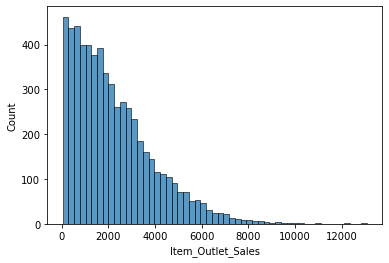

In [76]:
sns.histplot(y_train)

We can see that sales is a skewed distribution, where we have a lot of items being sold between 0 and 2000. We can also typically see that the range of sales is between 0 and 12000.

In [77]:
def train_and_eval(model, X_train, y_train, cv=5):
  cv_results = cross_validate(model, X_train, y_train, scoring=('r2', 'neg_root_mean_squared_error'))
  print('Model:', model)
  r2_scores = cv_results['test_r2']
  print('R2 CV Scores:', r2_scores)
  print('R2 CV Scores Mean / Stdev :', np.mean(r2_scores), '/', np.std(r2_scores))

  rmse_scores = cv_results['test_neg_root_mean_squared_error']
  rmse_scores = [-1*score for score in rmse_scores]
  print('RMSE CV Scores:', rmse_scores)
  print('RMSE CV Scores Mean / Stdev :', np.mean(rmse_scores), '/', np.std(rmse_scores))


In [78]:
rf = RandomForestRegressor(random_state=42)
train_and_eval(rf, X_train_final, y_train)

Model: RandomForestRegressor(random_state=42)
R2 CV Scores: [0.57060768 0.5268083  0.54281021 0.55421798 0.52017727]
R2 CV Scores Mean / Stdev : 0.5429242875459817 / 0.01828158855152387
RMSE CV Scores: [1104.0666302663794, 1168.4808032468748, 1180.6054342042014, 1154.4334423647522, 1202.0836655939197]
RMSE CV Scores Mean / Stdev : 1161.9339951352256 / 32.888811410647826


In [79]:
gb = GradientBoostingRegressor(random_state=42)
train_and_eval(gb, X_train_final, y_train)

Model: GradientBoostingRegressor(random_state=42)
R2 CV Scores: [0.6065274  0.59366925 0.57356358 0.60924345 0.55022613]
R2 CV Scores Mean / Stdev : 0.5866459646024772 / 0.022148578096336337
RMSE CV Scores: [1056.8793046591481, 1082.786581771003, 1140.2068860094903, 1080.838373141466, 1163.8349579736446]
RMSE CV Scores Mean / Stdev : 1104.9092207109504 / 40.23395923794627


In [80]:
hgb = HistGradientBoostingRegressor(random_state=42)
train_and_eval(hgb,X_train_final, y_train)

Model: HistGradientBoostingRegressor(random_state=42)
R2 CV Scores: [0.58793884 0.54297938 0.54501125 0.585042   0.54567103]
R2 CV Scores Mean / Stdev : 0.5613284973532673 / 0.0205841656268121
RMSE CV Scores: [1081.5559461370956, 1148.3411312834949, 1177.760118083806, 1113.806369963145, 1169.713511250089]
RMSE CV Scores Mean / Stdev : 1138.235415343526 / 35.957026103361265


In [81]:
xgr = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
train_and_eval(xgr, X_train_final, y_train)

Model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=None,
             gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, predictor=None, random_state=42,
             reg_alpha=None, reg_lambda=None, ...)
R2 CV Scores: [0.57766545 0.55385219 0.55544925 0.58722341 0.52691616]
R2 CV Scores Mean / Stdev : 0.5602212911784988 / 0.021004678765331467
RMSE CV Scores: [1094.9554601203774, 1134.5990151909684, 1164.1721103377881, 1110.8749017984524, 1193.6124678645144]
RMSE CV

In [82]:
lgbr = LGBMRegressor(random_state=42)
train_and_eval(lgbr, X_train_final, y_train)

Model: LGBMRegressor(random_state=42)
R2 CV Scores: [0.58004901 0.55259555 0.55516768 0.58277062 0.52755651]
R2 CV Scores Mean / Stdev : 0.559627874889652 / 0.020251066067928033
RMSE CV Scores: [1091.8612470331566, 1136.1957755653818, 1164.540723961399, 1116.8505638989286, 1192.8043728595292]
RMSE CV Scores Mean / Stdev : 1140.450536663679 / 35.37581677293254


From the above results, we can see that Gradient boost with a mean R2 score of 0.5866 and a mean rmse of 1104 is the best performing model. It even has a low standard deviation when compared to the other Boosting algorithms. Which means the chance of over fitting of this model is lower when compared to the other models.

## Handling Categorical Data

Our X_train_final dataset has a lot of features which makes model training to be time consuming. What if we drop Item_Identifier feature? What kind of a model performance can we get?

In [83]:
cat_feat = X_train.select_dtypes(include=['object']).drop(columns=['Item_Identifier'])
hot = OneHotEncoder(handle_unknown='ignore')
hot.fit(cat_feat)
hot_feature_names = hot.get_feature_names_out(input_features=cat_feat.columns)

In [84]:
num_feat_train = X_train.select_dtypes(exclude=['object']).reset_index(drop=True)
cat_feat_train = X_train.select_dtypes(include=['object']).drop(columns=['Item_Identifier'])
X_train_cat_hot = pd.DataFrame(hot.transform(cat_feat_train).toarray(), columns=hot_feature_names)

X_train_final = pd.concat([num_feat_train, X_train_cat_hot], axis=1)

X_train_final.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low_Fat,Item_Fat_Content_Non_Edible,Item_Fat_Content_Regular,Item_Type_Drink,Item_Type_Food,Item_Type_Non_consumables,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,7.72,0.147904,116.6466,1998,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,19.75,0.014301,103.0332,1997,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,8.60,0.054221,129.1310,1985,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,19.35,0.118342,222.6088,2002,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,18.35,0.092150,184.8266,1987,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [85]:
X_train_final.shape

(5966, 30)

Before we had 1573 features but now we have reduced that number to 30 features. Again lets train our models with the reduced number of features

In [98]:
rf = RandomForestRegressor(random_state=42)
train_and_eval(rf, X_train_final, y_train)

Model: RandomForestRegressor(random_state=42)
R2 CV Scores: [0.55764434 0.52036625 0.53286187 0.57476215 0.53274805]
R2 CV Scores Mean / Stdev : 0.5436765305138774 / 0.019703669937012593
RMSE CV Scores: [1120.6085807329773, 1176.407784733225, 1193.3811536172027, 1127.5182546968865, 1186.2325861080005]
RMSE CV Scores Mean / Stdev : 1160.8296719776586 / 30.577675851623987


In [86]:
gb = GradientBoostingRegressor(random_state=42)
train_and_eval(gb, X_train_final, y_train)

Model: GradientBoostingRegressor(random_state=42)
R2 CV Scores: [0.6027587  0.58477918 0.57733175 0.61716814 0.5638745 ]
R2 CV Scores Mean / Stdev : 0.5891824563495011 / 0.01880337124010431
RMSE CV Scores: [1061.9286612011877, 1094.5675808387577, 1135.1580306171122, 1069.8223327510743, 1146.040671315857]
RMSE CV Scores Mean / Stdev : 1101.5034553447979 / 33.864902948875674


In [87]:
hgb = HistGradientBoostingRegressor(random_state=42)
train_and_eval(hgb,X_train_final, y_train)

Model: HistGradientBoostingRegressor(random_state=42)
R2 CV Scores: [0.58793884 0.54297938 0.54501125 0.585042   0.54567103]
R2 CV Scores Mean / Stdev : 0.5613284973532673 / 0.0205841656268121
RMSE CV Scores: [1081.5559461370956, 1148.3411312834949, 1177.760118083806, 1113.806369963145, 1169.713511250089]
RMSE CV Scores Mean / Stdev : 1138.235415343526 / 35.957026103361265


In [88]:
xgr = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
train_and_eval(xgr, X_train_final, y_train)

Model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=None,
             gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, predictor=None, random_state=42,
             reg_alpha=None, reg_lambda=None, ...)
R2 CV Scores: [0.52875515 0.49143569 0.49824114 0.52327428 0.49002308]
R2 CV Scores Mean / Stdev : 0.5063458681032317 / 0.016390122414739954
RMSE CV Scores: [1156.6220207270226, 1211.3676200429215, 1236.812995169755, 1193.8284240585206, 1239.2803147435334]
RMSE CV 

In [89]:
lgbr = LGBMRegressor(random_state=42)
train_and_eval(lgbr, X_train_final, y_train)

Model: LGBMRegressor(random_state=42)
R2 CV Scores: [0.58004901 0.55259555 0.55516768 0.58277062 0.52755651]
R2 CV Scores Mean / Stdev : 0.559627874889652 / 0.020251066067928033
RMSE CV Scores: [1091.8612470331566, 1136.1957755653818, 1164.540723961399, 1116.8505638989286, 1192.8043728595292]
RMSE CV Scores Mean / Stdev : 1140.450536663679 / 35.37581677293254


So,now when we compare the models, we can see that Gradient Boosting model gives us a higher R^2 value when compared to the other models. It also has a low RMSE of 1101. When we compare the Gradient Boosting model with 1578 features to the one with 30 features, we can see a slight increase in R^2 and a slight decrease in RMSE.

But what if we still want to include Item_Identifier because here we are dealing with specific products, but we somehow still want to do some feature reduction? We will use a function from Sklearn called FeatureHasher, which is like the Vectorizer function in NLP. This function will convert every category in Item_Identifier column into a fixed size vector.

In [99]:
hash_vector_size = 50
fh = FeatureHasher(n_features=hash_vector_size, input_type='string')
hashed_df = pd.DataFrame(fh.transform(X_train['Item_Identifier']).toarray(), columns=['H'+str(i) for i in range(hash_vector_size)])

hashed_df.head()

,H0,H1,H2,H3,H4,H5,H6,H7,H8,H9,...,H40,H41,H42,H43,H44,H45,H46,H47,H48,H49
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,...,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


This basically means that, now, we have 50 features to represent Item_Identifier instead of 1000s of features.

In [100]:
cat_feat = X_train.select_dtypes(include=['object']).drop(columns=['Item_Identifier'])
hot = OneHotEncoder(handle_unknown='ignore')
hot.fit(cat_feat)
hot_feature_names = hot.get_feature_names_out(input_features=cat_feat.columns)

In [101]:
num_feat_train = X_train.select_dtypes(exclude=['object']).reset_index(drop=True)
cat_feat_train = X_train.select_dtypes(include=['object']).drop(columns=['Item_Identifier'])
X_train_cat_hot = pd.DataFrame(hot.transform(cat_feat_train).toarray(), columns=hot_feature_names)

X_train_final = pd.concat([num_feat_train, hashed_df, X_train_cat_hot], axis=1)

X_train_final.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,H0,H1,H2,H3,H4,H5,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,7.72,0.147904,116.6466,1998,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,19.75,0.014301,103.0332,1997,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,8.60,0.054221,129.1310,1985,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,19.35,0.118342,222.6088,2002,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,18.35,0.092150,184.8266,1987,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [102]:
X_train_final.shape

(5966, 80)

Now we will use Gradient Boosting and Histogram Gradient Boosting to train our models, because these are the two(2) models which having been giving us the highest performances.

In [103]:
gb = GradientBoostingRegressor(random_state=42)
train_and_eval(gb, X_train_final, y_train)

Model: GradientBoostingRegressor(random_state=42)
R2 CV Scores: [0.60925032 0.58397322 0.5751741  0.62583265 0.55910308]
R2 CV Scores Mean / Stdev : 0.5906666737420407 / 0.02392939856791301
RMSE CV Scores: [1053.2160345502873, 1095.6293690709922, 1138.0517459234395, 1057.6465771457638, 1152.292730312246]
RMSE CV Scores Mean / Stdev : 1099.3672914005458 / 40.452732110104556


In [104]:
hgb = HistGradientBoostingRegressor(random_state=42)
train_and_eval(hgb,X_train_final, y_train)

Model: HistGradientBoostingRegressor(random_state=42)
R2 CV Scores: [0.57112928 0.54632393 0.54394452 0.59656053 0.54665091]
R2 CV Scores Mean / Stdev : 0.56092183595542 / 0.02039262730858387
RMSE CV Scores: [1103.3958453566315, 1144.1315363460883, 1179.1399565120698, 1098.2388784421416, 1168.4514237526794]
RMSE CV Scores Mean / Stdev : 1138.6715280819221 / 32.9651953570445


We can see that the average RMSE for Gradient Boosting has gone down from 1101 to 1099 but the RMSE for Histogram Gradient Boosting has gone up slightly. So, now lets pick Gradient Boosting as our best performing model and see how does it performs on unseen data, i.e test data.

In [105]:
X_test.shape

(2557, 11)

In [106]:
hashed_test_df = pd.DataFrame(fh.transform(X_test['Item_Identifier']).toarray(), columns=['H'+str(i) for i in range(hash_vector_size)])
num_feat_test = X_test.select_dtypes(exclude=['object']).reset_index(drop=True)
cat_feat_test = X_test.select_dtypes(include=['object']).drop(columns=['Item_Identifier'])
X_test_cat_hot = pd.DataFrame(hot.transform(cat_feat_test).toarray(), columns=hot_feature_names)

X_test_final = pd.concat([num_feat_test, hashed_test_df, X_test_cat_hot], axis=1)

X_test_final.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,H0,H1,H2,H3,H4,H5,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,14.300,0.026300,79.4302,1987,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,7.930,0.071136,42.7086,1997,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,14.500,0.041313,42.0454,1999,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,13.000,0.044767,173.7054,1985,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,10.195,0.012456,197.5110,2004,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [107]:
X_test_final.shape

(2557, 80)

In [109]:
gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train_final, y_train)

GradientBoostingRegressor(random_state=42)

In [110]:
y_pred = gb.predict(X_test_final)

In [111]:
print('R2 Score:', r2_score(y_test, y_pred))
print('RMSE Score:', mean_squared_error(y_test, y_pred, squared=False))

R2 Score: 0.5973641182370731
RMSE Score: 1061.970102545934


We can see that the model performed really well on the unseen data. Now lets plot feature importance for XG Boost model to see the important features in our dataset.

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

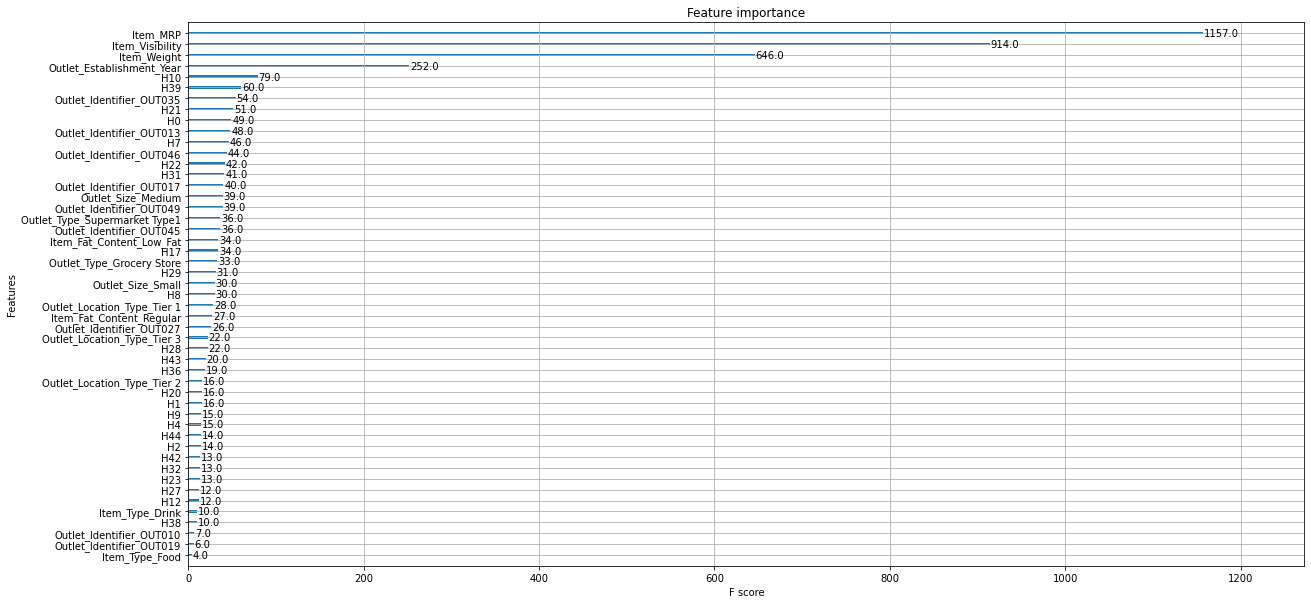

In [120]:
xgr = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgr.fit(X_train_final, y_train)

fig, ax = plt.subplots(1, 1, figsize=(20, 10))
plot_importance(xgr, ax=ax)

#ax = xgboost.plot_importance()

This figure shows us that Item_MRP, Item_Weight and Item_Visibility are the most important features.

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description Or Model Findings ⚡ |
| :--------------------------- |
| After applying the trained Machine Learning Models on the test data, we found that the Gradient Boosting model to be the overall best performing model among all other models trained. Some models like the `Histogram Gradient Boost`, `Extreme Gradient Boost` and the `LightGBM` were  implemented,and were also found to have good performance.

The Gradient Boost model came out with the highest `R^2 Score` and the lowest `RMSE Score`. 



###  Conclusion

We went through multiple stages of data cleaning and feature engineering to improve the data, train a Machine Learning Model and arrive at a model with a good performance to better predict unseen data.

- we also decreased the number of features to feed into our model, which improved slightly the model performance.

---